### <h1 style="font-family:cambria;font-size:43px;"   align=center >Medical Diagnosis : Heart Diseases </h1>
#  
**Overview:**
This project aims to develop a predictive model for detecting heart disease based on various risk factors and medical attributes. By leveraging machine learning techniques and predictive modeling, the goal is to create a tool that can assist in early detection and diagnosis of heart-related conditions.

**Key Features:**
* **Data Collection**: Gather a comprehensive dataset containing information such as age, sex, cholesterol levels, blood pressure, and other relevant features associated with heart disease.
* **Data Preprocessing**: Clean and preprocess the data to handle missing values, normalize features, and ensure data quality for model training.
* **Model Development**: Build and train a machine learning model using algorithms like Support Vector Machines (SVM), Random Forest, or Logistic Regression to predict the likelihood of heart disease based on the input features.
* **Model Evaluation**: Evaluate the model's performance using metrics like accuracy, precision, recall, and F1 score to assess its effectiveness in predicting heart disease cases.
* **Interactive Prediction Tool**: Develop an interactive tool that allows users to input their medical data and receive real-time predictions on their risk of heart disease.

**Benefits:**
* **Early Detection**: Enable early detection of heart disease by analyzing key risk factors and symptoms.
* **Personalized Risk Assessment**: Provide individuals with personalized risk assessments based on their medical data.
* **Decision Support**: Assist healthcare providers in making informed decisions and recommendations for patient care.

In [26]:
import pandas as pd
# Load the dataset
data = pd.read_csv('heart_disease.csv') 


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [28]:
data

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


above data shows some rows of the data and each row represents a patient and each column represents a different attribute or feature related to heart health

* To know the relations between the all 13 variables in the dataset . To achive that we're going to generate pairplot using Seaborn library . 

* Each cell in the pairplot grid shows the relationship between two variables, and the diagonal cells display a univariate distribution of that variable.

* **Diagonal Plots (Top left to Bottom right)**:
These are histograms or kernel density plots showing the distribution of each individual variable in the dataset.

* **Off-Diagonal Plots** :
These are scatter plots showing the relationship between pairs of variables. Each scatter plot represents the relationship between two variables, with points colored based on the 'target' variable (heart disease presence).

* **Interpreting the Scatter Plots**:
  * If the points in a scatter plot are scattered randomly, it indicates a weak or no relationship between the variables.
  * If the points form a pattern or trend (e.g., linear, curved), it suggests a relationship between the variables.
  * Different colors in the scatter plots represent different classes of the 'target' variable (heart disease presence or absence).

* **Hue Parameter**:
The hue='target' parameter colors the points in the scatter plots based on the 'target' variable, making it easier to see how the variables relate to the presence or absence of heart disease.

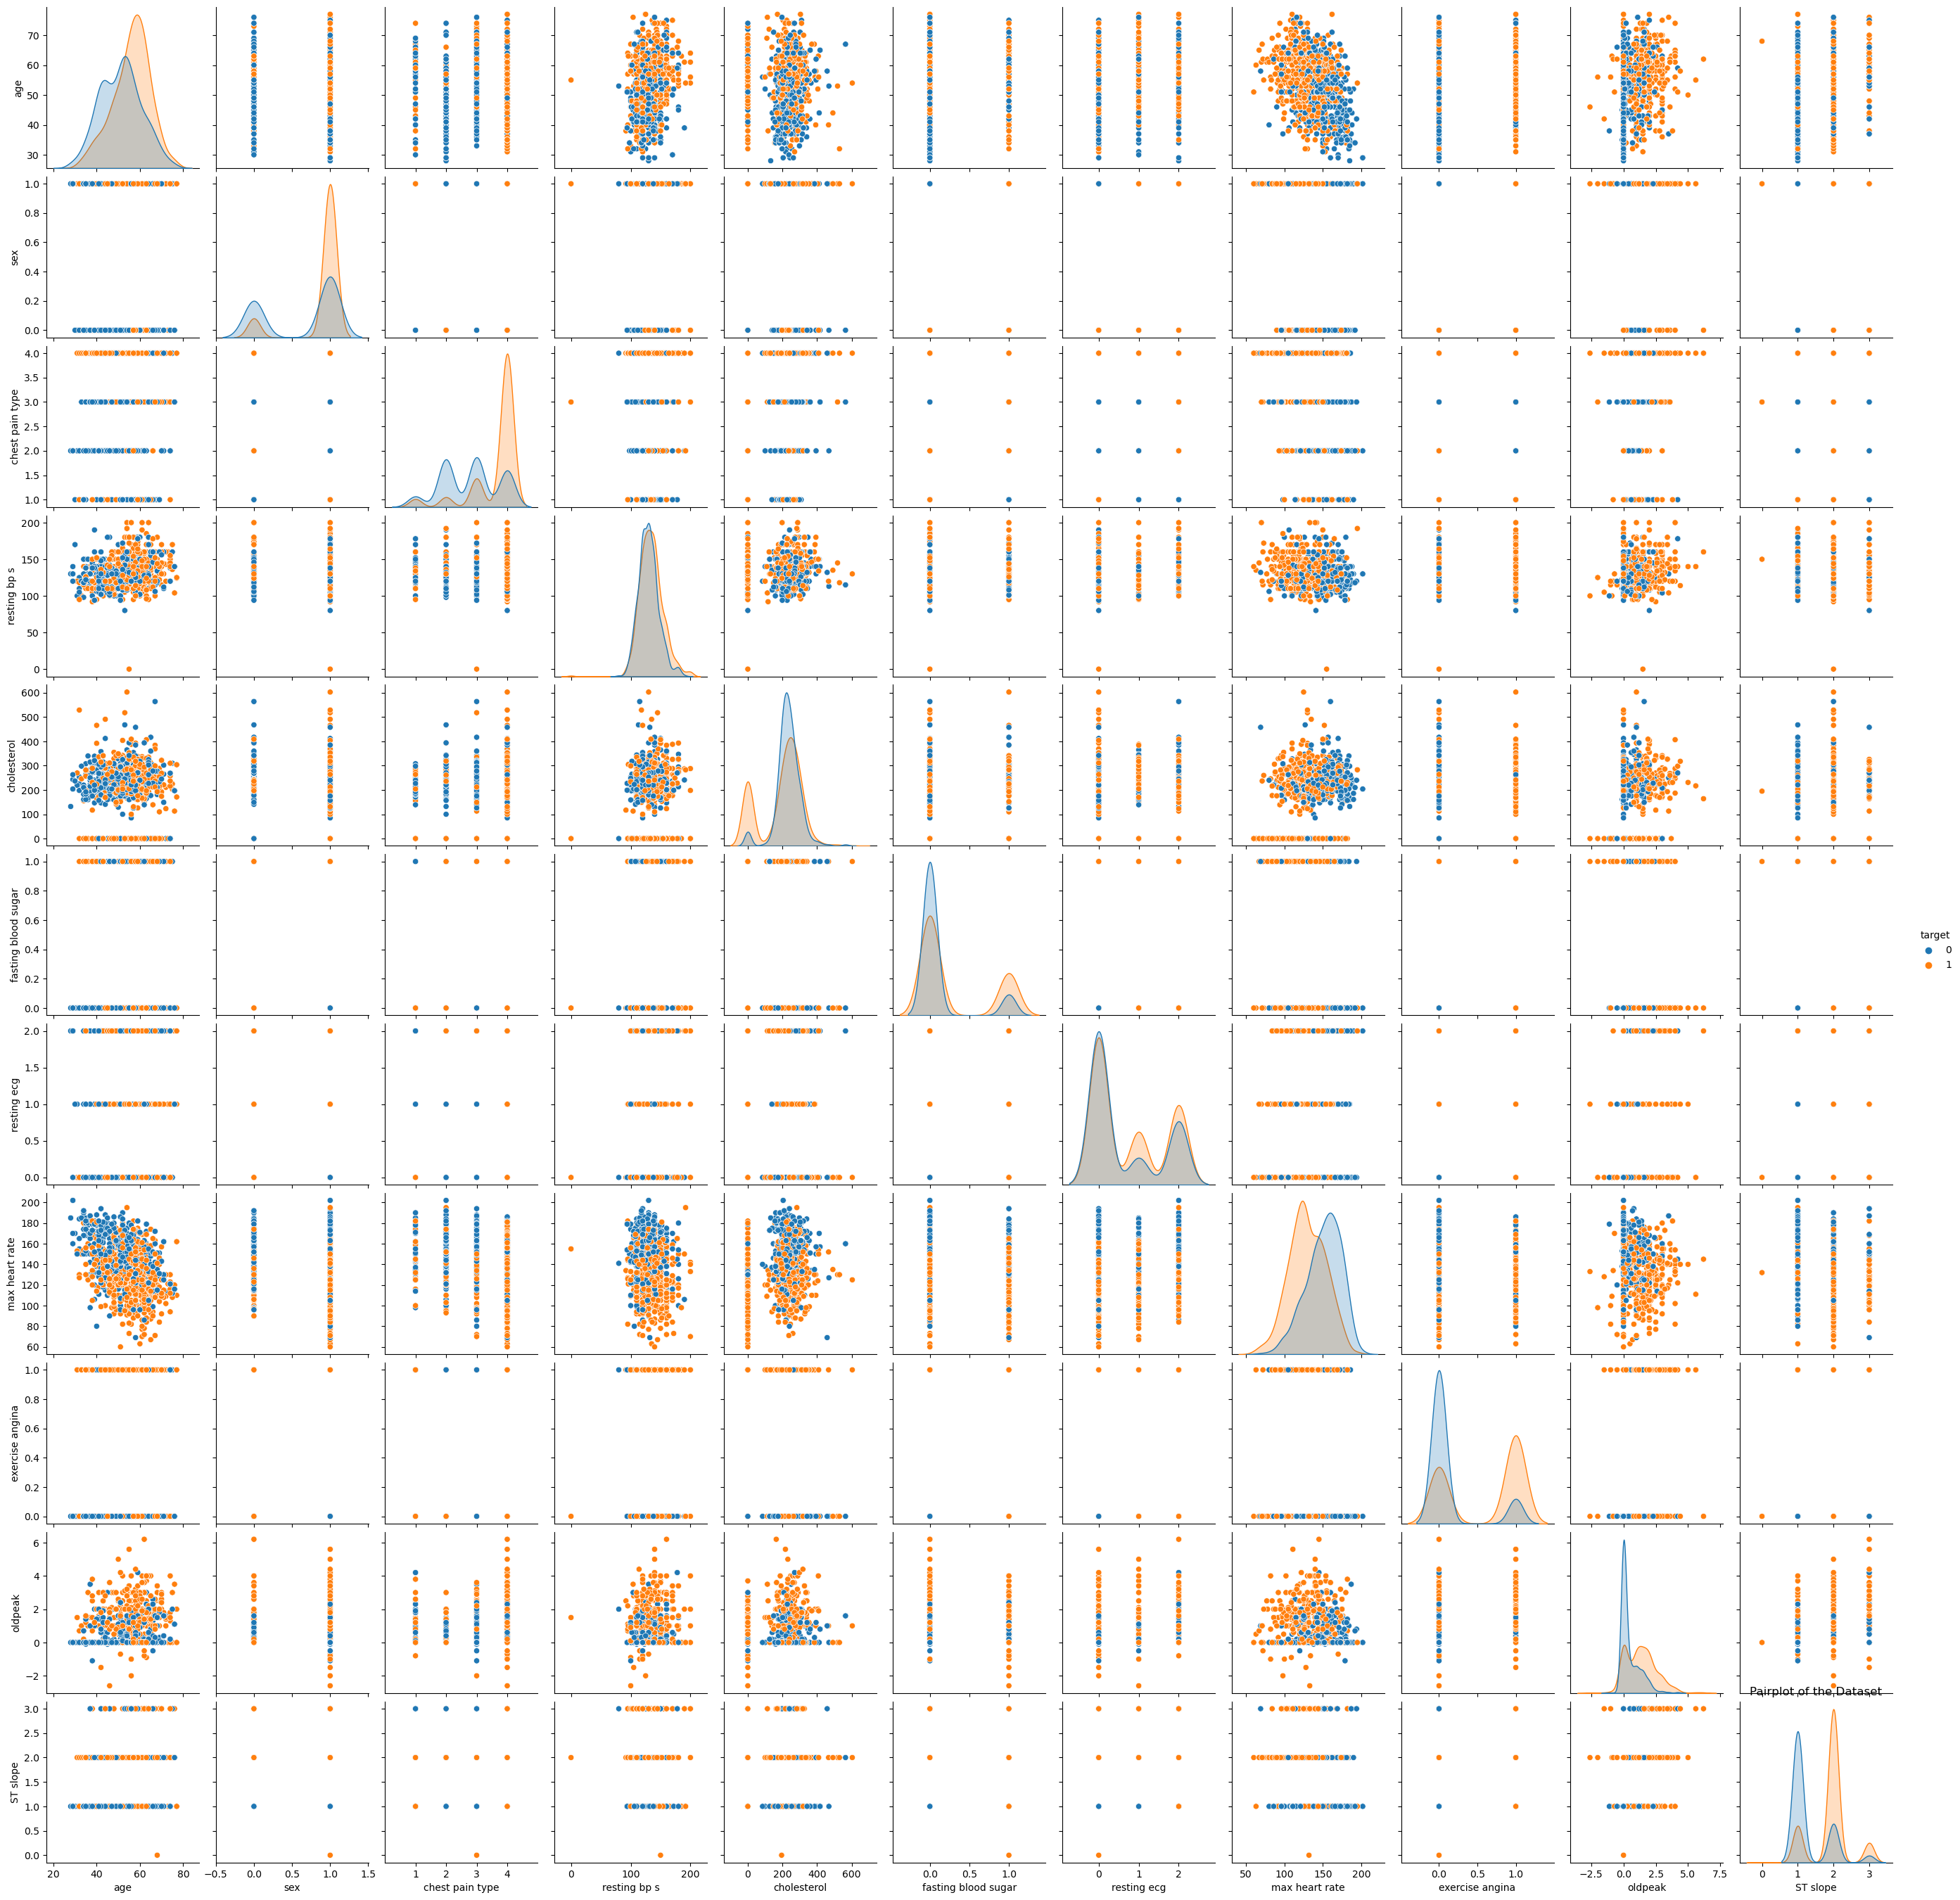

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
# Data exploration
sns.pairplot(data, hue='target')
plt.title('Pairplot of the Dataset')
plt.show()



**Splitting the Data**:
X: Contains the features used for prediction. It includes all columns from the original dataset except for the 'target' column.
y: Contains the target variable to be predicted, which is the 'target' column from the original dataset.

**Features (X)**:
The features include columns like 'age', 'sex', 'cp' (chest pain type), 'trestbps' (resting blood pressure), 'chol' (serum cholesterol), and others.
The features are stored in a DataFrame with 1025 rows and 13 columns.

**Target Variable (y)**:
The target variable 'y' contains the values indicating the presence (1) or absence (0) of heart disease for each corresponding row in the dataset.
It is stored as a Series with 1025 values.

In [30]:
data.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [31]:
heart_disease_dataset = data[data["target"] == 1]

<Axes: title={'center': 'Age wise breakup of people suffering heart disease'}, xlabel='age', ylabel='count'>

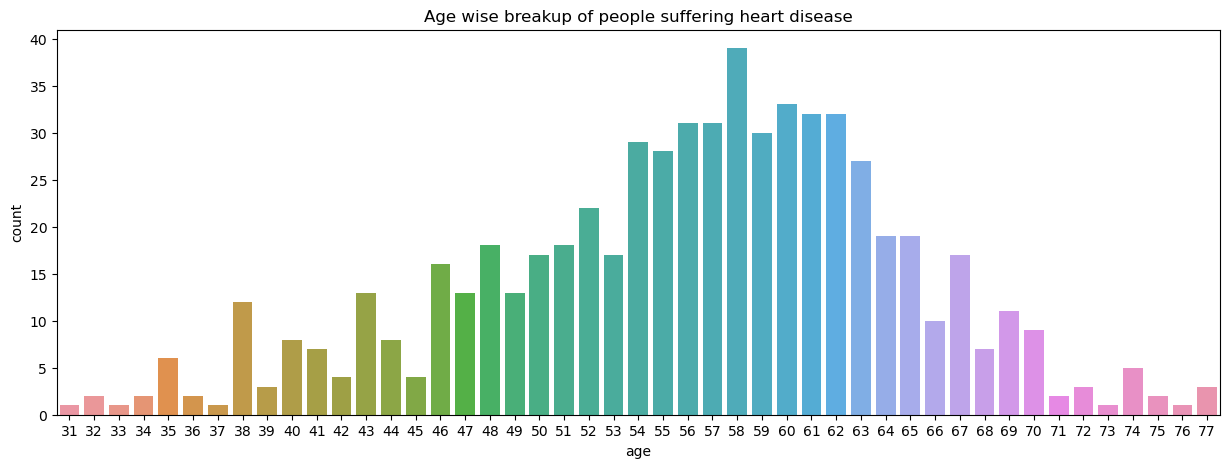

In [32]:
plt.figure(figsize=(15,5))
plt.title("Age wise breakup of people suffering heart disease")
sns.countplot(x="age",data=heart_disease_dataset)

In [37]:
data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [38]:
data["target"].value_counts()

1    629
0    561
Name: target, dtype: int64

In [39]:
# Mean of all features with respect to target variable
data.groupby("target").mean()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
target,,,,,,,,,,,
0,51.124777,0.623886,2.777184,129.793226,231.657754,0.119430,0.631016,150.894831,0.139037,0.464706,1.297683
1,56.034976,0.888712,3.639110,134.259141,191.372019,0.297297,0.758347,129.777424,0.608903,1.331320,1.915739


In [40]:
# Separating data and target variable
X = data.drop(columns="target",axis=1)
Y = data["target"]

**Splitting the Data**:
* X_train, X_test: These variables store the features (X) split into training and testing sets, with 80% of the data used for training (X_train) and 20% for testing (X_test).
* y_train, y_test: These variables store the corresponding target variable (y) split into training and testing sets.

**Parameters**:
  * test_size=0.2: This parameter specifies that 20% of the data will be used for testing, while 80% will be used for training.
  * random_state=42: This parameter sets the random seed for reproducibility, ensuring that the data split is consistent each time the code is run.

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(X)
print(standardized_data)
# Reassigning the data to standardized data to X
X = standardized_data

[[-1.46672783  0.55599543 -1.31835093 ... -0.79521891 -0.84979236
  -1.02321701]
 [-0.50460037 -1.79857595 -0.24893198 ... -0.79521891  0.07111913
   0.61558278]
 [-1.78743698  0.55599543 -1.31835093 ... -0.79521891 -0.84979236
  -1.02321701]
 ...
 [ 0.35062404  0.55599543  0.82048698 ...  1.25751537  0.25530143
   0.61558278]
 [ 0.35062404 -1.79857595 -1.31835093 ... -0.79521891 -0.84979236
   0.61558278]
 [-1.68053393  0.55599543 -0.24893198 ... -0.79521891 -0.84979236
  -1.02321701]]


In [62]:

from sklearn.model_selection import train_test_split
# Splitting standardized data and target variable between train data and test data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)
# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", Y_train.shape)
print("y_test shape:", Y_test.shape)

X_train shape: (952, 11)
X_test shape: (238, 11)
y_train shape: (952,)
y_test shape: (238,)


**Initializing the SVM Classifier**:
 * An instance of the SVC class is created and assigned to the variable svm.
 * No specific parameters are provided, so the default parameters of the SVC class are used.
 
**Fitting (Training)**:
* Data Preparation: The SVC classifier takes in the training data (X_train and y_train) and prepares it for training.
* Feature Scaling: The classifier scales the features to have zero mean and unit variance, which is a common practice in machine learning to prevent features with large ranges from dominating the model.
* Kernel Trick: The classifier applies the kernel trick to transform the data into a higher-dimensional space, where it's easier to find a separating hyperplane.
* Hyperplane Selection: The classifier finds the optimal hyperplane that maximally separates the classes in the higher-dimensional space.
* Support Vectors: The classifier identifies the support vectors, which are the data points that lie closest to the hyperplane and have the most influence on its position.

**Predicting**:
* Data Preparation: The SVC classifier takes in the testing data (X_test) and prepares it for prediction.
* Feature Scaling: The classifier scales the testing data using the same scaling parameters as during training.
* Kernel Trick: The classifier applies the kernel trick to transform the testing data into the same higher-dimensional space as during training.
* Hyperplane Evaluation: The classifier evaluates the testing data points with respect to the optimal hyperplane found during training.
* Prediction: The classifier predicts the class label for each testing data point based on which side of the hyperplane it falls.
 
to have a better view on how the  support vector machine classifier(SVC()) works we can check this out by the documentation by sklearn:                
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [63]:
from sklearn.svm import SVC
# Initialize SVM classifier
svm = SVC()

# Train the SVM classifier
svm.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

In [64]:

from sklearn.metrics import accuracy_score, confusion_matrix
# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8823529411764706


In [58]:


# Generate confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[49  7]
 [ 3 60]]


The confusion matrix is a 2x2 matrix, where each row and column represent the actual and predicted classes, respectively. Here, the classes are 0 (no heart disease) and 1 (heart disease).
* True Negatives (TN): The top-left value (94) represents the number of true negatives, which means the model correctly predicted the absence of heart disease.
* False Positives (FP): The top-right value (18) represents the number of false positives, which means the model incorrectly predicted the presence of heart disease when it was actually absent.
* False Negatives (FN): The bottom-left value (10) represents the number of false negatives, which means the model incorrectly predicted the absence of heart disease when it was actually present.
* True Positives (TP): The bottom-right value (116) represents the number of true positives, which means the model correctly predicted the presence of heart disease.

From the confusion matrix, you can calculate various performance metrics to evaluate your SVM classifier:
* Accuracy: The overall accuracy of the model is calculated as (TN + TP) / (TN + FP + FN + TP). with our confusion matrix the accuracy is (94 + 116) / (94 + 18 + 10 + 116) = 0.8823529411764706, 
* Precision: Precision is the ratio of true positives to the total number of positive predictions (TP / (TP + FP)). It measures the model's ability to correctly identify positive instances.
* Recall (Sensitivity): Recall is the ratio of true positives to the total number of actual positive instances (TP / (TP + FN)). It measures the model's ability to correctly identify all positive instances.
* Specificity: Specificity is the ratio of true negatives to the total number of actual negative instances (TN / (TN + FP)). It measures the model's ability to correctly identify negative instances.

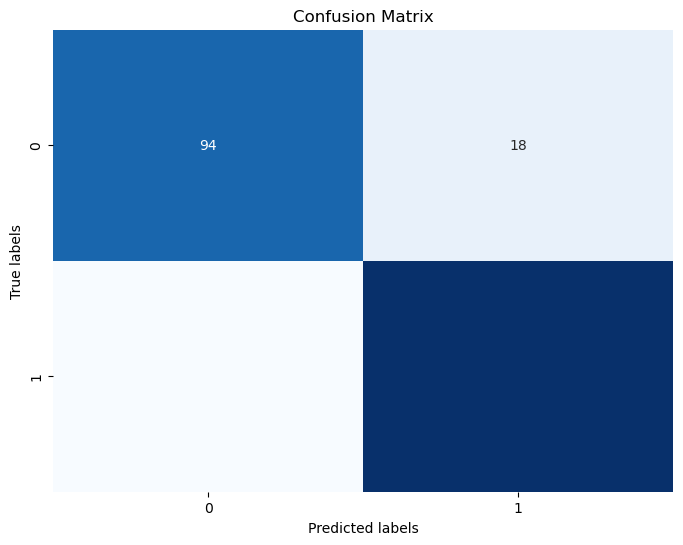

In [49]:


# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Now to test the model we need to make some new inputs and check if the model can predict the heart disease or not like this 

**Example:**
* **Age**: 69 - Older age is a risk factor for heart disease.
* **Sex**: 1 (Male) - Males are generally at higher risk for heart disease.
* **Chest Pain Type (cp)**: 2 - This type of chest pain can be associated with heart issues.
* **Resting Blood Pressure (trestbps)**: 180 - High blood pressure is a significant risk factor.
* **Cholesterol (chol)**: 500 - Very high cholesterol levels can indicate heart disease risk.
* **Fasting Blood Sugar (fbs)**: 1 - Elevated fasting blood sugar can be a sign of diabetes, a risk factor for heart disease.
* **Resting Electrocardiographic Results (restecg)**: 1 - Abnormal ECG results can indicate heart issues.
* **Maximum Heart Rate Achieved (thalach)**: 193 - A high heart rate can sometimes be a sign of heart stress.
* **Exercise Induced Angina (exang)**: 1 - Angina during exercise is a symptom of heart disease.
* **ST Depression Induced by Exercise Relative to Rest (oldpeak)**: 5.7 - Significant ST depression can indicate heart problems.
* **Slope of the Peak Exercise ST Segment (slope)**: 1 - Certain slope patterns can be associated with heart disease.


by all the above symptoms the patient will definitely have a heart disease 

In [53]:
# Extend code to perform predictions dynamically
def predict_with_model(model):
    new_data_point = []
    features = ['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope']
    for feature in features:
        while True:
            try:
                value = float(input(f"Enter value for {feature} (within range {data[feature].min()} - {data[feature].max()}): "))
                if value < data[feature].min() or value > data[feature].max():
                    print("Value out of range. Please enter value within the specified range.")
                    continue
                new_data_point.append(value)
                break
            except ValueError:
                print("Invalid input. Please enter a valid number.")
    prediction = model.predict([new_data_point])
    if prediction[0] == 1:
        print("Heart Disease Detected")
    else:
        print("No Heart Disease Detected")


In [54]:
predict_with_model(svm)

Enter value for age (within range 28 - 77): 49
Enter value for sex (within range 0 - 1): 0
Enter value for chest pain type (within range 1 - 4): 4
Enter value for resting bp s (within range 0 - 200): 138
Enter value for cholesterol (within range 0 - 603): 214
Enter value for fasting blood sugar (within range 0 - 1): 0
Enter value for resting ecg (within range 0 - 2): 0
Enter value for max heart rate (within range 60 - 202): 108
Enter value for exercise angina (within range 0 - 1): 1
Enter value for oldpeak (within range -2.6 - 6.2): 1.5
Enter value for ST slope (within range 0 - 3): 2
Heart Disease Detected
